
Logistic Regression Evaluation Metrics:
Accuracy: 1.0000
Precision (macro): 1.0000
Recall (macro): 1.0000
F1 Score (macro): 1.0000

Random Forest Evaluation Metrics:
Accuracy: 1.0000
Precision (macro): 1.0000
Recall (macro): 1.0000
F1 Score (macro): 1.0000

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Classification Report for Random Forest:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30

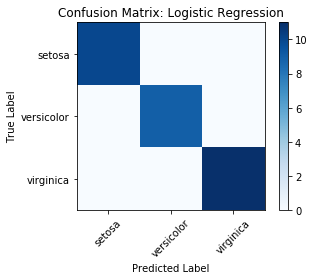

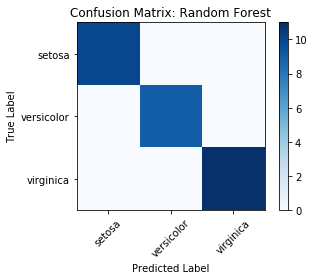

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import json
import os

# Create a folder to store results if it doesn't exist
os.makedirs("core_metrics", exist_ok=True)

# Load the Iris dataset (a standard multiclass classification dataset)
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to calculate evaluation metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision (macro)": precision_score(y_test, y_pred, average='macro'),
        "Recall (macro)": recall_score(y_test, y_pred, average='macro'),
        "F1 Score (macro)": f1_score(y_test, y_pred, average='macro'),
        "Confusion Matrix": confusion_matrix(y_test, y_pred).tolist()  # Convert to list for JSON saving
    }

# Dictionary to store results from each model
results = {}

# Train and evaluate Logistic Regression
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)
results['Logistic Regression'] = evaluate_model(lr_model, X_test, y_test)

# Train and evaluate Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
results['Random Forest'] = evaluate_model(rf_model, X_test, y_test)

# Print evaluation results in readable format
for model, metrics in results.items():
    print(f"\n{model} Evaluation Metrics:")
    for metric_name, value in metrics.items():
        if metric_name != "Confusion Matrix":
            print(f"{metric_name}: {value:.4f}")

# Print classification reports for detailed per-class analysis 
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, lr_model.predict(X_test), target_names=class_names))

print("\nClassification Report for Random Forest:")
print(classification_report(y_test, rf_model.predict(X_test), target_names=class_names))

# Save full results to a JSON file
with open("core_metrics/results.json", "w") as f:
    json.dump(results, f, indent=4)

# Save flat results to CSV 
flat_results = []
for model, metrics in results.items():
    row = {"Model": model}
    for key, value in metrics.items():
        if key != "Confusion Matrix":
            row[key] = value
    flat_results.append(row)

pd.DataFrame(flat_results).to_csv("core_metrics/results.csv", index=False)

# Optional: Visualize confusion matrices for both models
for model, metrics in results.items():
    cm = np.array(metrics["Confusion Matrix"])
    plt.figure(figsize=(5, 4))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix: {model}')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.savefig(f"core_metrics/{model}_confusion_matrix.png")  # Save plot as image
    plt.show()
